## Part 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
print(tf.__version__)

import keras

2.10.0


1) Processing

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = \
fashion_mnist.load_data()

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

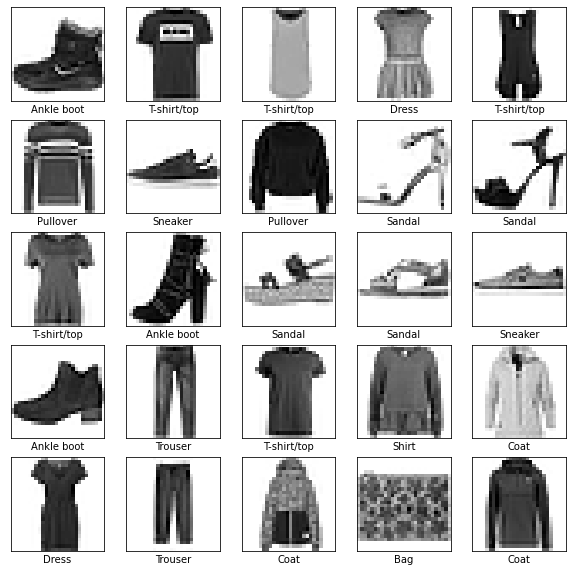

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

2) Modeling

In [7]:
# Добали несколько слоёв, все функции активации представлены 'relu'
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(90, activation='relu'), 
    keras.layers.Dense(90, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam', # оставили как наиболее подходящий
              loss=tf.keras.losses.SparseCategoricalCrossentropy\
              (from_logits=True),
              metrics=['accuracy'])

3) Learning

In [9]:
# Увеличили кол-во эпох
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5185 - accuracy: 0.8124
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3439 - accuracy: 0.8735
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3200 - accuracy: 0.8821
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3054 - accuracy: 0.8861


In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3693 - accuracy: 0.8656 - 751ms/epoch - 2ms/step

Test accuracy: 0.8655999898910522


4) Predicting

In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [13]:
predictions[5]

array([1.6371536e-06, 9.9998498e-01, 1.5482949e-07, 4.4025865e-06,
       1.9328077e-06, 2.9270434e-17, 6.8516147e-06, 3.2538635e-17,
       2.7045099e-08, 3.1433787e-15], dtype=float32)

In [14]:
np.argmax(predictions[5])

1

In [15]:
test_labels[5]

1

In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

5) Testing

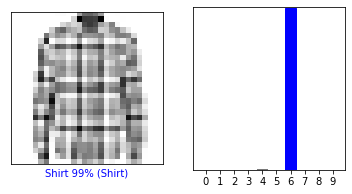

In [17]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

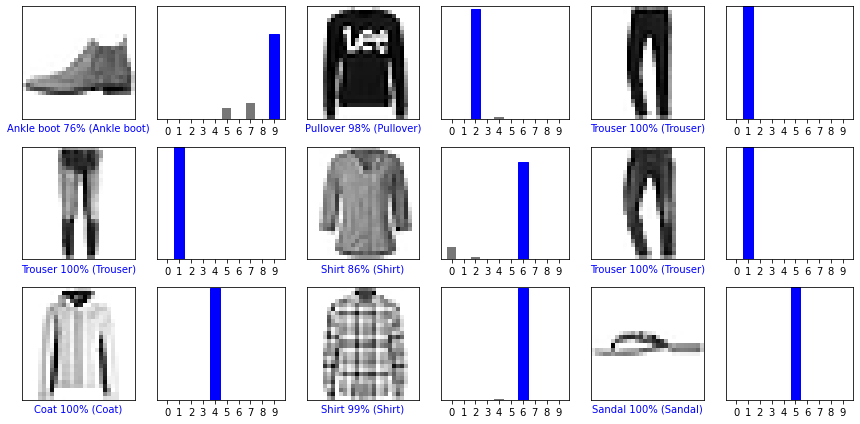

In [18]:

num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Part 2

In [19]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
from keras import models, layers

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [23]:
X, y = boston.data, boston.target

1) Разбиваем данные

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=16)

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

2) Нормируем данные

In [26]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

3) Создаём архитектуру

In [27]:
model = models.Sequential()

In [57]:
#  Комбинируем кол-во слоёв и/или нейрон, подбираем функции активации
model.add(layers.Dense(6, activation='sigmoid', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(1))

4) Компилируем модель

In [58]:
# Определяемся с оптимайзером, функцией потерь и метрикой
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

5) Обучаем модель

In [59]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=90)

Epoch 1/90
11/11 [==============================] - 3s 43ms/step - loss: 590.3716 - mae: 22.4822 - val_loss: 600.8038 - val_mae: 22.4219
Epoch 2/90
11/11 [==============================] - 0s 7ms/step - loss: 581.8361 - mae: 22.2952 - val_loss: 593.3942 - val_mae: 22.2559
Epoch 3/90
11/11 [==============================] - 0s 7ms/step - loss: 574.5447 - mae: 22.1297 - val_loss: 585.8298 - val_mae: 22.0852
Epoch 4/90
11/11 [==============================] - 0s 6ms/step - loss: 566.9660 - mae: 21.9558 - val_loss: 578.1507 - val_mae: 21.9106
Epoch 5/90
11/11 [==============================] - 0s 7ms/step - loss: 559.1300 - mae: 21.7762 - val_loss: 570.0186 - val_mae: 21.7241
Epoch 6/90
11/11 [==============================] - 0s 7ms/step - loss: 550.7363 - mae: 21.5869 - val_loss: 561.5094 - val_mae: 21.5274
Epoch 7/90
11/11 [==============================] - 0s 7ms/step - loss: 542.0396 - mae: 21.3842 - val_loss: 552.2073 - val_mae: 21.3103
Epoch 8/90
11/11 [=============================

6) Оценка модели

In [60]:
model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 0s/step - loss: 29.9968 - mae: 4.2456


[29.99677276611328, 4.245570182800293]

7) Предсказательная способность модели

In [61]:
to_predict = X_train_scaled[:3]
predictions = model.predict(to_predict)
predictions

1/1 [==============================] - 0s 232ms/step


array([[17.29493 ],
       [27.881493],
       [26.561348]], dtype=float32)

In [62]:
y_train[:3]

array([15.2, 24.2, 23.4])